In [22]:
import numpy as np
import tensorflow as tf

print(tf.__version__)

2.11.0


In [23]:

from pathlib import Path

local_dir = Path().cwd()
train_dir = local_dir / 'data/train/'
test_dir = local_dir / 'data/test/'
val_dir = local_dir / 'data/val/'

#Reads the data from disk
train_ds = tf.keras.utils.image_dataset_from_directory(train_dir, image_size=(224, 224), seed=123)
val_ds = tf.keras.utils.image_dataset_from_directory(val_dir, image_size=(224, 224), seed=123)
test_ds = tf.keras.utils.image_dataset_from_directory(test_dir, image_size=(224, 224), seed=123)

print(train_ds.class_names)
print(val_ds.class_names)
print(test_ds.class_names)



Found 3045 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
['NORMAL', 'PNEUMONIA']
['NORMAL', 'PNEUMONIA']
['NORMAL', 'PNEUMONIA']


In [24]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical", seed=123),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomBrightness(0.3),
    tf.keras.layers.RandomContrast(0.3)
])

In [25]:
# prints the shape of the training dataset
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 224, 224, 3)
(32,)


In [26]:
# Configure the dataset for performance
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [27]:
model = tf.keras.models.load_model('tfmodel_2')

In [28]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.2),
])
aug_train_ds = train_ds.map(
  lambda x, y: (data_augmentation(x, training=True), y),
  num_parallel_calls=AUTOTUNE
)

In [29]:
# Training the network
history = model.fit(
  aug_train_ds,
  validation_data=val_ds,
  batch_size=64,
  epochs=40
)

Epoch 1/40
96/96 [==============================] - 391s 4s/step - loss: 0.1873 - accuracy: 0.9343 - val_loss: 0.1393 - val_accuracy: 0.9375
Epoch 2/40
96/96 [==============================] - 377s 4s/step - loss: 0.1343 - accuracy: 0.9465 - val_loss: 0.0963 - val_accuracy: 1.0000
Epoch 3/40
96/96 [==============================] - 377s 4s/step - loss: 0.1116 - accuracy: 0.9612 - val_loss: 0.1667 - val_accuracy: 0.9375
Epoch 4/40
96/96 [==============================] - 365s 4s/step - loss: 0.1126 - accuracy: 0.9599 - val_loss: 0.1943 - val_accuracy: 0.9375
Epoch 5/40
96/96 [==============================] - 356s 4s/step - loss: 0.0995 - accuracy: 0.9658 - val_loss: 0.1201 - val_accuracy: 1.0000
Epoch 6/40
96/96 [==============================] - 356s 4s/step - loss: 0.0942 - accuracy: 0.9649 - val_loss: 0.0582 - val_accuracy: 1.0000
Epoch 7/40
96/96 [==============================] - 356s 4s/step - loss: 0.0740 - accuracy: 0.9744 - val_loss: 0.2494 - val_accuracy: 0.8750
Epoch 8/40
96

In [30]:
score = model.evaluate(test_ds)

20/20 [==============================] - 22s 1s/step - loss: 0.4725 - accuracy: 0.8958


In [31]:

print(score)

[0.4725181758403778, 0.8958333134651184]


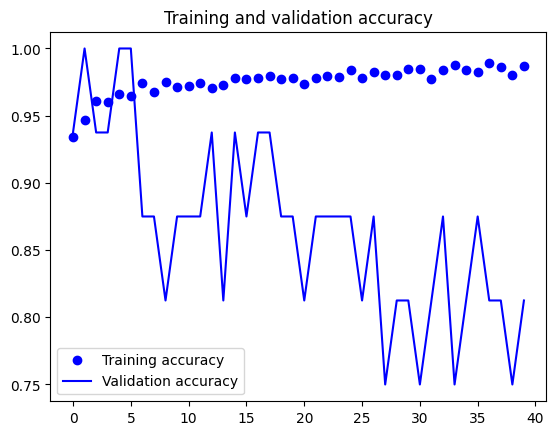

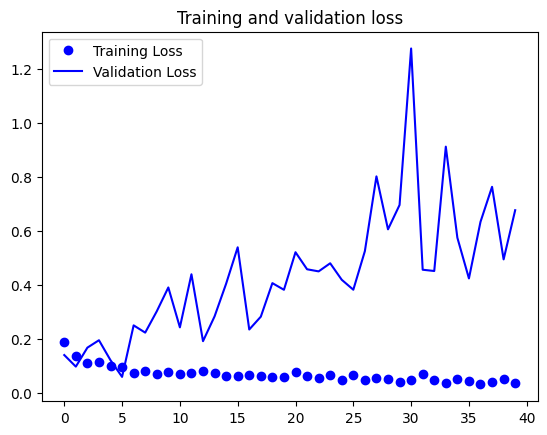

In [32]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [33]:
model.save('tfmodel_3')

INFO:tensorflow:Assets written to: tfmodel_3\assets


INFO:tensorflow:Assets written to: tfmodel_3\assets
